In [2]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET



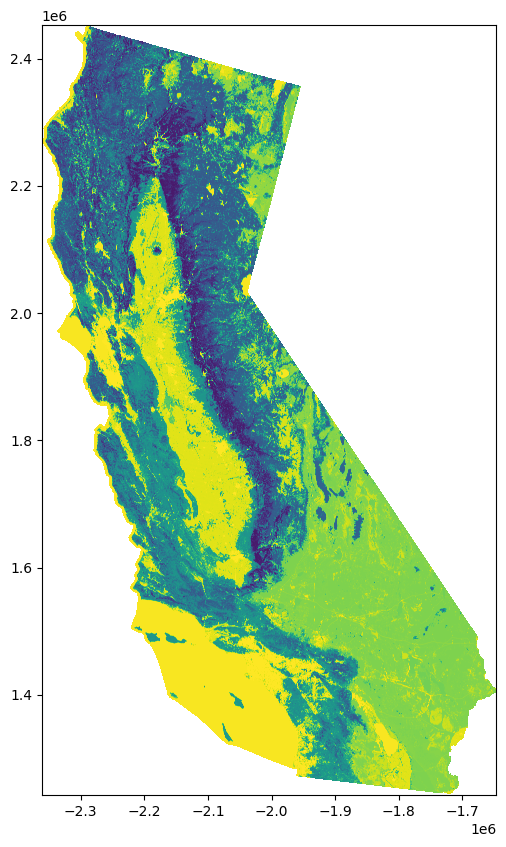

<Axes: >

In [3]:
# Read in the data
# Load the GeoTIFF file
raster_data = rasterio.open('/Volumes/LaCie/Deep_Learning_Final_Project/Machine/gaplf2011lc_v30_CA/gaplf2011lc_v30_ca.tif')

# Visualize the raster
plt.figure(figsize=(10,10))
show(raster_data)

In [4]:
# View the tiff file metadata
raster_data.meta


{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 23816,
 'height': 40346,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(30.0, 0.0, -2361135.0,
        0.0, -30.0, 2452725.0)}

In [9]:
# Load the CSV file with an alternative encoding
csv_data = pd.read_csv('/Volumes/LaCie/Deep_Learning_Final_Project/Machine/gaplf2011lc_v30_CA/gaplf2011lc_v30_state_summary.csv', encoding='latin1')

# Display the first few rows of the CSV file
print(csv_data.head())

# save the dataframe as a csv file
csv_data.to_csv("/Volumes/LaCie/Deep_Learning_Final_Project/Machine/gaplf2011lc_v30_state_summary.csv", index=False)


   intStCode strStName  intClassCode       strClassName strFormCode  \
0         12   Florida             1  Forest & Woodland       1.A.1   
1         12   Florida             1  Forest & Woodland       1.A.1   
2         12   Florida             1  Forest & Woodland       1.A.1   
3         12   Florida             1  Forest & Woodland       1.A.4   
4         12   Florida             1  Forest & Woodland       1.A.4   

                       strFormName strMacroCode  \
0   Tropical Dry Forest & Woodland         M134   
1   Tropical Dry Forest & Woodland         M134   
2   Tropical Dry Forest & Woodland         M134   
3  Tropical Flooded & Swamp Forest         M617   
4  Tropical Flooded & Swamp Forest         M617   

                           strMacroName  intEcoSysCode  \
0  Caribbean Coastal Lowland Dry Forest           4132   
1  Caribbean Coastal Lowland Dry Forest           4135   
2  Caribbean Coastal Lowland Dry Forest           4134   
3                       Caribbean 

In [7]:
# Munge so that we are only dealing with California data
ca_data = csv_data[csv_data['strStName'] == 'California']

# Display the first few rows of the California data
print(ca_data)

# save the CA filtered data
ca_data.to_csv('/Volumes/LaCie/Deep_Learning_Final_Project/Machine/GAP_CA_Summary.csv')

      intStCode   strStName  intClassCode  \
52            6  California             1   
126           6  California             1   
128           6  California             1   
131           6  California             1   
133           6  California             1   
...         ...         ...           ...   
3685          6  California            11   
3737          6  California            11   
3749          6  California            12   
3766          6  California            12   
3802          6  California            12   

                                       strClassName strFormCode  \
52                                Forest & Woodland       1.B.1   
126                               Forest & Woodland       1.B.1   
128                               Forest & Woodland       1.B.1   
131                               Forest & Woodland       1.B.1   
133                               Forest & Woodland       1.B.1   
...                                             ...      

In [12]:
# Read and print .txt metadata
with open('/Volumes/LaCie/Deep_Learning_Final_Project/Machine/gaplf2011lc_v30_CA/GAP_LANDFIRE_NATIONAL_Terrestrial_Ecosystems_2011_Attributes.txt', 'r') as file:
    txt_data = file.read()
    print(txt_data)


Value	Count	RED	GREEN	BLUE	CL	NVC_CLASS	SC	NVC_SUBCL	FRM	NVC_FORM	DIV	NVC_DIV	MACRO_CD	NVC_MACRO	GR	NVC_GROUP	LEVEL3	ECOLSYS_LU	NVCMES
0	5973621751	0	0	0													0		E0
1	382166	0	0.51765	0.4902	1	Forest & Woodland	1.A	Tropical Forest & Woodland	1.A.4	Tropical Flooded & Swamp Forest	1.A.4.Ed	Caribbean-Central American Flooded & Swamp Forest	M617	Caribbean Swamp	G002	Caribbean Lowland Swamp	9238	South Florida Bayhead Swamp	1.A.4.Ed M617G002E1
2	976706	0	0.51765	0.4902	1	Forest & Woodland	1.A	Tropical Forest & Woodland	1.A.4	Tropical Flooded & Swamp Forest	1.A.4.Ed	Caribbean-Central American Flooded & Swamp Forest	M617	Caribbean Swamp	G002	Caribbean Lowland Swamp	9702	South Florida Cypress Dome	1.A.4.Ed M617G002E2
3	726902	0	0.51765	0.4902	1	Forest & Woodland	1.A	Tropical Forest & Woodland	1.A.4	Tropical Flooded & Swamp Forest	1.A.4.Ed	Caribbean-Central American Flooded & Swamp Forest	M617	Caribbean Swamp	G002	Caribbean Lowland Swamp	9305	South Florida Dwarf Cypress Savanna	1.A.4.Ed M

In [15]:
# Parse and print .xml metadata
try:
    tree = ET.parse('/Volumes/LaCie/Deep_Learning_Final_Project/Machine/gaplf2011lc_v30_CA/GAP_LANDFIRE_NATIONAL_Terrestrial_Ecosystems_2011.xml')
    root = tree.getroot()
    # Now you can navigate through the XML tree
    for child in root:
        print(child.tag, child.attrib)
except ET.ParseError as pe:
    print("There was a problem parsing the XML file:", pe)

idinfo {}
dataqual {}
spdoinfo {}
spref {}
eainfo {}
distinfo {}
distinfo {}
distinfo {}
distinfo {}
distinfo {}
distinfo {}
distinfo {}
metainfo {}


In [17]:
# Dive deeper into the XML structure
for child in root:
    print(f"Element: {child.tag}")
    for subchild in child:
        print(f"  Sub-element: {subchild.tag}")
        if subchild.text:
            text = subchild.text.strip()
            if text:  # Only print if there's text content
                print(f"    Content: {text}")
        for attrib_key, attrib_value in subchild.attrib.items():
            print(f"    Attribute: {attrib_key}, Value: {attrib_value}")


Element: idinfo
  Sub-element: citation
  Sub-element: descript
  Sub-element: timeperd
  Sub-element: status
  Sub-element: spdom
  Sub-element: keywords
  Sub-element: accconst
    Content: none
  Sub-element: useconst
    Content: Inappropriate Uses: It is far easier to identify appropriate uses than inappropriate
      ones, however, there is a "fuzzy line" that is eventually crossed when the differences in
      resolution of the data, size of geographic area being analyzed, and precision of the answer
      required for the question are no longer compatible. Examples include:
 - Using the 2001
      and 2011 land cover data sets to quantify change (see Data Use Constraints).
 -Using the
      data to map small areas (less than thousands of hectares), typically requiring mapping
      resolution at 1:24,000 scale and using aerial photographs or ground surveys.
 -Combining
      these data with other data finer than 1:100,000 scale to produce new hybrid maps or answer
      queries

In [16]:
# For the .dbf file, if it's part of the raster data, you can explore it using rasterio as follows:
with rasterio.open('/Volumes/LaCie/Deep_Learning_Final_Project/Machine/gaplf2011lc_v30_CA/gaplf2011lc_v30_ca.tif') as src:
    print(src.tags(ns='IMAGE_STRUCTURE'))

{'COMPRESSION': 'LZW', 'INTERLEAVE': 'BAND'}


The common attribute is geospartial data in the datasets. We can extract the latitude and longitude from the MODIS data as well as the GAP Vegitation data. Then we should be able to go on the next step. 